In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplfinance as mpl
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
from scipy import interpolate
from detrend import detrend

In [2]:
sns.set_theme()
## Lecture des données
data_folder = "../data"
stock_name = "AAPL"
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)

In [3]:
detrend_model = detrend(method="PolynomialRegression", poly_order=3, n_segments=10)
y_fitted = detrend_model.fit(df["Close"])
y_detrend = detrend_model.predict(df["Close"])

Text(0.5, 0.98, 'Detrend visual summary')

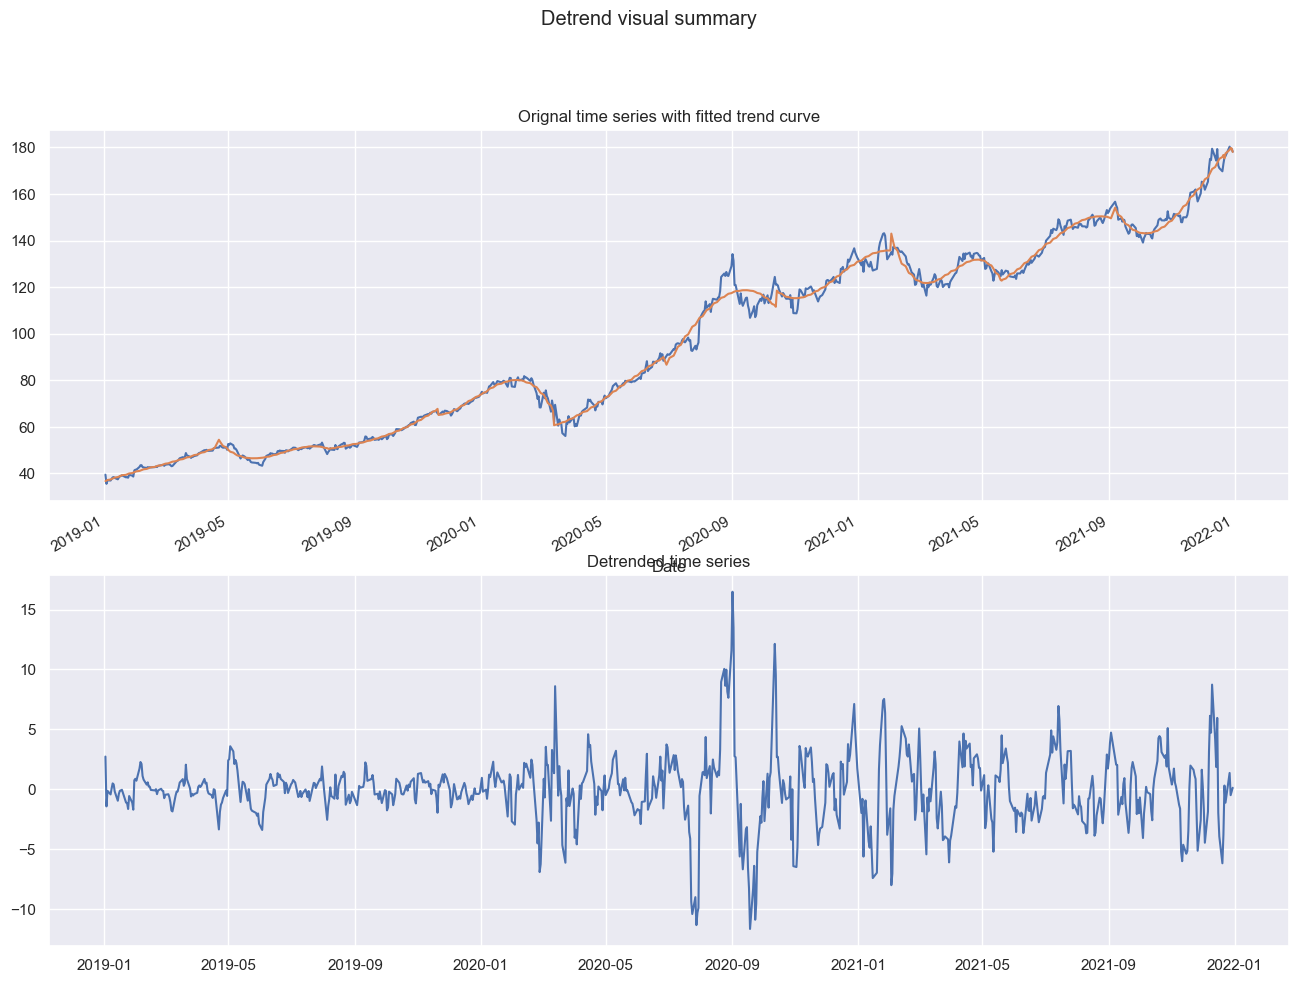

In [11]:
# Fancy plot

_, axs = plt.subplots(2, 1, figsize=(16, 12))

# first plot
df["Close"].plot(ax=axs[0], label="label")
axs[0].plot(df.index, y_fitted)
axs[0].set_title("Orignal time series with fitted trend curve")
axs[0].set_label("s")

# second plot
axs[1].plot(df.index, y_detrend)
axs[1].set_title("Detrended time series")


# main plot
plt.suptitle("Detrend visual summary")